In [ ]:
Observation1: Last 100 tweets refeering to CBS and FOX is mostly Positive.
Observation2: Last 100 tweets refeering to BBC and CNN are  mostly Poitive or neutral sentiments.
Observation3: Last 100 tweets refeering to CNN are  mostly neutral sentiments.

In [2]:
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import time
import seaborn as sns
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from datetime import datetime 
%matplotlib inline

In [3]:
# Twitter API Keys
consumer_key = "DcKiE8BJZ2kdqjtKpZPsLMB4c"
consumer_secret = "vtKkC2ieEv8sd0MjKHKWCXH81D5Tko1SWfPUhFoNGiEGAoaxkK"
access_token = "942846023411609601-E0Ydz29HxJjc0GwsWl0mBS7VAzS4MfG"
access_token_secret = "zMUaPpc1NPqbpbQWi5F2dgB4CQdXqYzkx5zRlHKFTqnKA"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
target_user = ("@nytimes", "@CBS", "@FOX", "@CNN", "@BBC")

sentiments = []
# Loop through each user
for user in target_user:
    counter = 1

    public_tweets = api.user_timeline(user, result_type="recent", count = 100)

    for tweet in public_tweets:
        print(json.dumps(tweet, sort_keys=True, indent=4, separators=(',', ': ')))
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]

        sentiments.append({"Date": tweet["created_at"],
                                   "Account": tweet['user']['screen_name'],
                                   "Text": tweet["text"],
                                   "Compound": analyzer.polarity_scores(tweet["text"])["compound"],
                                   "Positive": analyzer.polarity_scores(tweet["text"])["pos"],
                                   "Negative": analyzer.polarity_scores(tweet["text"])["neu"],
                                   "Neutral": analyzer.polarity_scores(tweet["text"])["neg"],
                                   "Tweets Ago": counter})
        counter += 1

In [6]:
sentiments_pd = pd.DataFrame.from_dict(sentiments)


In [7]:
sentiments_pd.head()


,Account,Compound,Date,Negative,Neutral,Positive,Text,Tweets Ago
0,nytimes,0.0000,Tue Jan 09 03:02:06 +0000 2018,1.000,0.000,0.000,10 shows we’ll be talking about in January\nht...,1
1,nytimes,0.0000,Tue Jan 09 02:56:02 +0000 2018,1.000,0.000,0.000,RT @NYTSports: That first half was all Dawgs. ...,2
2,nytimes,0.0000,Tue Jan 09 02:42:04 +0000 2018,1.000,0.000,0.000,North and South Korea began their first direct...,3
3,nytimes,-0.3818,Tue Jan 09 02:32:03 +0000 2018,0.906,0.094,0.000,RT @HannaIngber: We heard from a lot of reader...,4
4,nytimes,0.1531,Tue Jan 09 02:21:03 +0000 2018,0.798,0.088,0.113,Trump's lawyers are assessing the risks of all...,5


In [8]:
sentiments_pd.to_csv("Media_sentiments.csv")

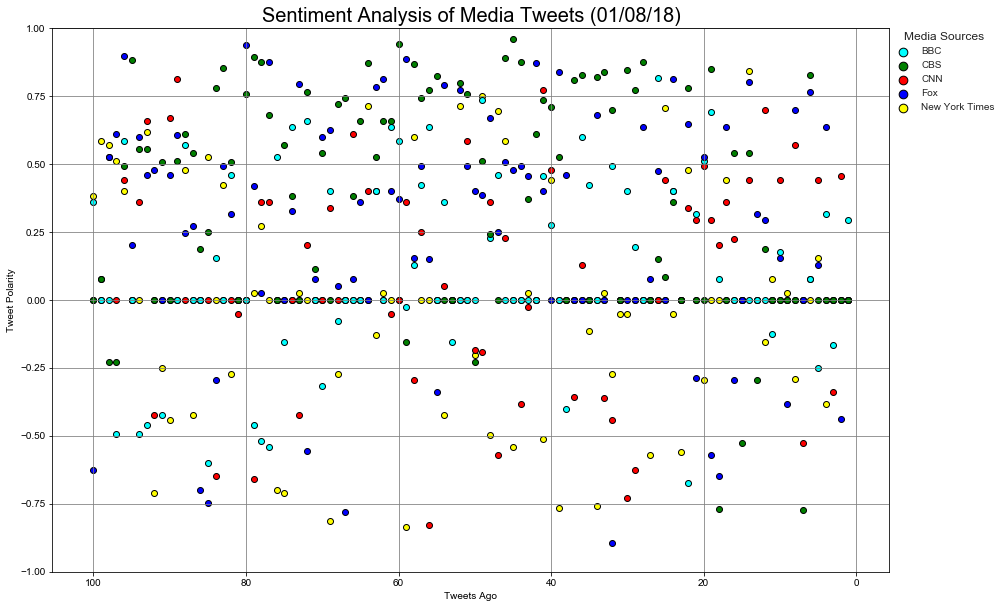

In [9]:
plt.figure(figsize=(15,10))
plt.scatter(sentiments_pd[sentiments_pd.Account=='nytimes']['Tweets Ago'],
            sentiments_pd[sentiments_pd.Account=='nytimes']['Compound'],
           label='New York Times', color='yellow', edgecolors='black')
plt.scatter(sentiments_pd[sentiments_pd.Account=='CNN']['Tweets Ago'],
            sentiments_pd[sentiments_pd.Account=='CNN']['Compound'],
           label='CNN',  color='red', edgecolors='black')
plt.scatter(sentiments_pd[sentiments_pd.Account=='BBC']['Tweets Ago'],
            sentiments_pd[sentiments_pd.Account=='BBC']['Compound'],
           label='BBC', color='cyan', edgecolors='black')
plt.scatter(sentiments_pd[sentiments_pd.Account=='fox']['Tweets Ago'],
            sentiments_pd[sentiments_pd.Account=='fox']['Compound'],
           label='FOX', color='blue', edgecolors='black')
plt.scatter(sentiments_pd[sentiments_pd.Account=='CBS']['Tweets Ago'],
            sentiments_pd[sentiments_pd.Account=='CBS']['Compound'],
           label='CBS', color='green', edgecolors='black')

ax=plt.gca()
ax.set_xlim(ax.get_xlim()[::-1])
plt.ylim(-1, 1, 0.5)

plt.grid(True)
plt.grid(color="grey")
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%x")), fontsize=20)
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')

#Create legend from custom artist/label lists
type1 = plt.scatter([],[], s=75, marker='o', color='cyan', edgecolors='black')
type2 = plt.scatter([],[], s=75, marker='o', color='green', edgecolors='black')
type3 = plt.scatter([],[], s=75, marker='o', color='red', edgecolors='black')
type4 = plt.scatter([],[], s=75, marker='o', color='blue', edgecolors='black')
type5 = plt.scatter([],[], s=75, marker='o', color='yellow', edgecolors='black')
sns.set()

plt.legend((type1,type2,type3,type4,type5),
           ('BBC', 'CBS', 'CNN', 'Fox', 'New York Times'),
            scatterpoints=1,
            loc=2, 
            borderaxespad=0.,
            bbox_to_anchor=(1, 1),
            fontsize=10,
            title='Media Sources')
plt.savefig("Sentiment_Analysis_Media.png")
plt.show()

In [10]:
sentiment = sentiments_pd.groupby(["Account"], as_index = False)['Compound'].mean()
sentiment

,Account,Compound
0,BBC,0.091436
1,CBS,0.378797
2,CNN,0.074400
3,fox,0.244818
4,nytimes,0.000720


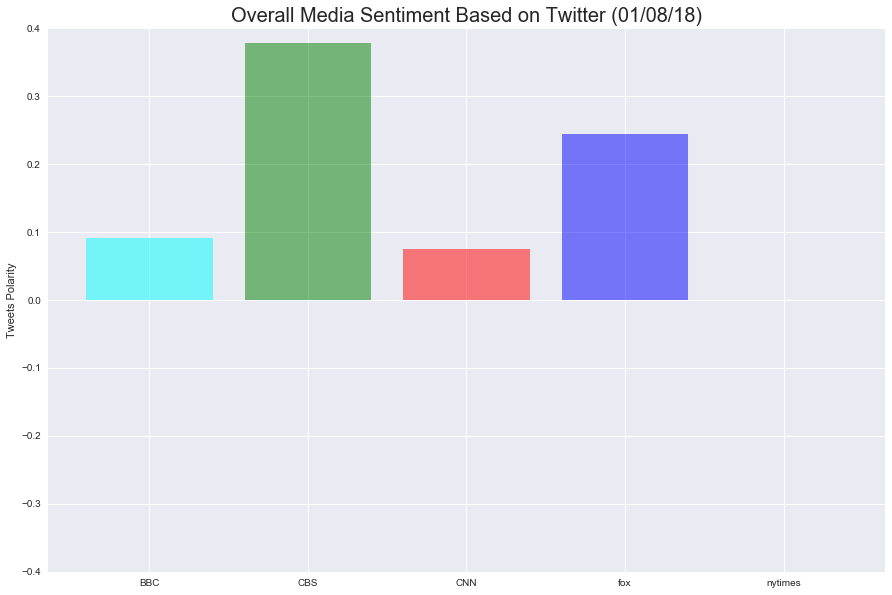

In [11]:
plt.figure(figsize=(15,10))
sns.set()
colors =["cyan", "green","red", "blue", "yellow"]
plt.bar(sentiment['Account'],sentiment['Compound'],color=colors,alpha=0.5,align='center')
plt.ylim(-0.4, 0.4, 0.5)
plt.title("Overall Media Sentiment Based on Twitter (%s)" % (time.strftime("%x")), fontsize=20)
plt.ylabel("Tweets Polarity")
plt.savefig("Overall_Media_Sentiment.png")
plt.show()